[0.022058823529411766, 0.041666666666666664, 0.11267605633802817, 0.0410958904109589, 0.036585365853658534, 0.030303030303030304, 0.022727272727272728, 0.058823529411764705, 0.06542056074766354, 0.04, 0.03488372093023256, 0.04291845493562232, 0.06451612903225806, 0.05434782608695652, 0.06766917293233082, 0.04, 0.07692307692307693, 0.03680981595092025, 0.05217391304347826, 0.0273972602739726, 0.02857142857142857, 0.016666666666666666, 0.02247191011235955, 0.05063291139240506, 0.045112781954887216]
[0.029411764705882353, 0.03125, 0.07042253521126761, 0.0410958904109589, 0.036585365853658534, 0.04040404040404041, 0.022727272727272728, 0.029411764705882353, 0.056074766355140186, 0.05333333333333334, 0.03488372093023256, 0.034334763948497854, 0.06451612903225806, 0.06521739130434782, 0.06766917293233082, 0.04, 0.05128205128205128, 0.06097560975609756, 0.034782608695652174, 0.0273972602739726, 0.023809523809523808, 0.025, 0.02247191011235955, 0.05063291139240506, 0.046153846153846156]
[0.029

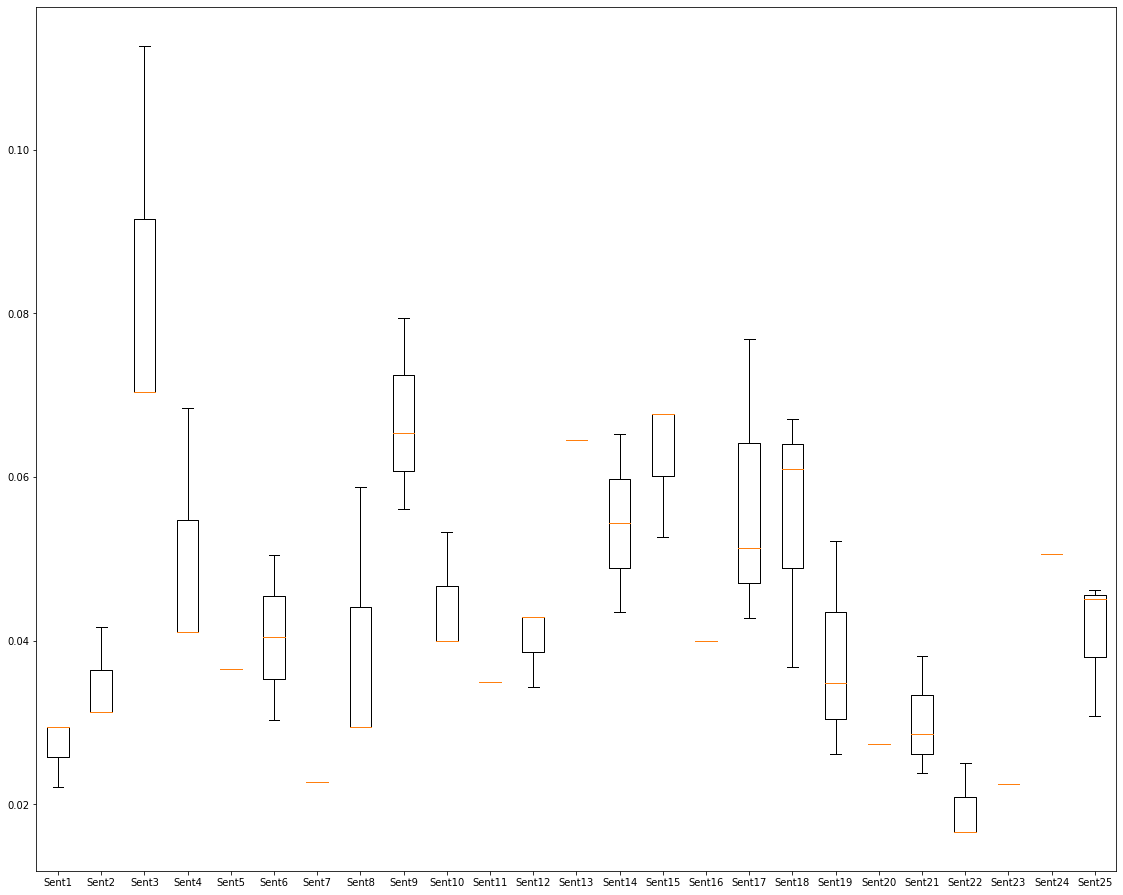

In [92]:
import speech_recognition as sr
import matplotlib.pyplot as plt
import distance
import os
class Speech:
    def __init__(self):
        self.original = []
        self.recognized = []
        self.distances = []

    def read_original(self, inFile):
        myFile = open(inFile,"r")
        for line in myFile:
            lr = line.replace('â€™', '\'')
            lr = lr.rstrip()
            self.original.append(lr)
        
        
    def conv_audio(self, inDir):
        self.recognized = []
        r = sr.Recognizer()
        for root, directories, files in os.walk(inDir):
            for filename in files:
                filepath = os.path.join(root, filename)
                with sr.AudioFile(filepath) as source:
                    audio = r.record(source)
                
                self.recognized.append(r.recognize_google(audio))
    
    def comp_string(self):
        self.distances = []
        for i in range(len(self.original)):
            ld = distance.levenshtein(self.original[i].split(),self.recognized[i].split())
            nld = ld/max(len(self.original[i]),len(self.recognized[i]))
            self.distances.append(nld)
        
if __name__ == '__main__':
    allnld = []
    speech = Speech()
    speech.read_original("How Speech Recognition Works.txt")
    
    directory = r'C:\Users\Ernie\AudioFiles'
    
    allfoldersPath = [f.path for f in os.scandir(directory) if f.is_dir()]
    
    for folderPath in allfoldersPath: #this gives all folder path for each group audio files
        
        speech.conv_audio(folderPath)
        speech.comp_string()
        allnld.append(speech.distances)
    #allnld= [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
    data = []
    x_label = []
    for i in range(len(allnld[0])):
        newlist = []
        x_label.append('Sent'+str(i+1))
        for j in range(len(allnld)):
            sent = allnld[j][i]
            newlist.append(sent) # grabbing each group normal leventhian distance for each sentid 
        data.append(newlist)
    
    fig = plt.figure(figsize = (15,12))
    ax = fig.add_axes([0, 0, 1, 1]) 
    bp = ax.boxplot(data)
    ax.set_xticklabels(x_label)
    plt.show()
    